In [2]:
from igraph import *
from copy import deepcopy
import numpy as np
from math import floor
from random import randint
from operator import itemgetter, attrgetter
from datetime import date
from time import localtime, strftime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# a function to generate the "robust version" of a given graph g
# according to the Barabasi "receipe"
# see http://barabasi.com/networksciencebook/chapter/8#buildin-robustness
#     http://barabasi.com/networksciencebook/chapter/8#advanced-8g
def robust_graph(g):
    # compute coefficient A
    g_avg_d = mean(g.degree())
    A = ((2 * g_avg_d ** 2 * (g_avg_d-1)**2) / (2*g_avg_d-1)) ** (float(1)/3)
    g_N = g.vcount()
    
    # compute kmax and kmin according to A
    kmax = int(round(A * (g_N ** (float(2)/3))))
    kmin_low = int(floor((g_N * g_avg_d - kmax) / (g_N - 1)))
    
    # as kmin will be rounded, balance nodes with kmin_low and kmin_low+1 to keep
    # the total number of links and avg degree of the original graph
    rem = ((g_N * g_avg_d - kmax) / (g_N - 1)) - kmin_low
    # 1-rem% of nodes must have degree kmin_low, the rest kmin_low+1
    
    # create the degree sequence to generate the graph
    n_low = int(round((g_N-1) * (1-rem)))
    n_high = (g_N-1) - n_low
    seq_deg_low = [kmin_low for i in range(0,n_low)]
    seq_deg_high = [kmin_low+1 for i in range(0,n_high)]
    seq_deg = seq_deg_high + seq_deg_low
    seq_deg.insert(0,kmax)
    
    # create the "robust" graph
    try:
        g_rob = Graph.Degree_Sequence(seq_deg, method="vl")
        print ("Robust graph generated with method \"vl\"")
    except:
        try:
            g_rob = Graph.Degree_Sequence(seq_deg, method="no_multiple")
            print ("Robust graph generated with method \"no_multiple\"")
        except:
            g_rob = Graph.Degree_Sequence(seq_deg, method="simple")
            print ("Robust graph generated with method \"simple\"")

    return g_rob

In [4]:
# set of functions to actually perform the attacks

DEBUG = True
GRANUL = 1000

sim_attacks = ["targ_deg_sim"]
seq_attacks = ["random", "targ_deg_seq"]
supported_attacks = sim_attacks + seq_attacks

# the list of nodes to attack in case of simultaneous attacks of type att_type
# assumes that vertices have a name, and returs the list of vertices to be attacked, by name, in order of attack
def attack_list(g, att_type):
    # 1. vert_cent[] must be a list of 2-tuples, e.g., [(1,2),(5,10),...]
    # 2. Each element corresponds to a node in the graph
    # 3. The first element of each tuple must be the name of the node
    # 4. The second element must be the centrality index corresponding to the particular attack we want to do
    vert_cent = []
    
    # ADD CODE HERE: add code to generate the list of vertices according to the sim attacks that need to be supported
    if att_type == "targ_deg_sim":    
        # ADD CODE HERE: add here the code to generate vert_cent for targ_deg_sim
        print ("ADD CODE HERE")

    # ADD CODE HERE: sort by the centrality metric in decreasing order
    # vert_cent[] must be sorted by the values of the second elements of the tuples, in decreasing order
    # to do so, look at how to sort structured elements here
    # https://docs.python.org/2/howto/sorting.html?highlight=sort#operator-module-functions
    print ("ADD CODE HERE")
    
    # no need to kill the last node
    del vert_cent[-1]
    
    # ADD CODE HERE:
    # kill_names must be a list of vertices names, in order of killing
    print ("ADD CODE HERE")
    kill_names = []
    
    return kill_names


# executes a random attack pattern until no node is left, and returns the list of GC proportions
# with respect to the original graph
def attack(g_orig, att_type):
    
    # check that the attack can be done
    if att_type not in supported_attacks:
        print ("Attack " + att_type + " is not supported")
        return None

    # deepcopy to avoid modifications to the original graph
    g = deepcopy(g_orig)
    
    # prepare for the output list
    # each element of GC_frac[] is a tuple in the following form
    # (fraction of removed vertices, fraction of vertices still in the GC)
    # This is the output of the attack, which will be used to plot the curves to identify the critical thresholds
    # and the robustness properties
    initial_size = g.vcount()
    GC_frac = [(0,1)]
    
    # count the # of killed vertices
    killed = 0
    
    # simultaneous attacks
    if att_type in sim_attacks:
        # must refer to vertices by name, as indexes are recomputed after each deletion
        for idx in range(0,g.vcount()):
            g.vs[idx]["name"] = str(idx)
            
        # get the ordered list of vertices to kill (as a list of vertex names)
        kill_list = attack_list(g, att_type)
    
        for kill_name in kill_list:
            # ADD CODE HERE:
            # we have the list of nodes to kill in kill_names, so:
            # 1. for each node to kill, we need to get its ID
            # 2. we need to kill the node by using its ID
            # 3. we increase the number of killed nodes (using the variable "killed")
            # 4. we insert a new point in the list GC_frac
            #    NB: if you have two INTEGERS a and b with a<b and you compute c = a/b, by default
            #        the RESULT WILL BE 0. To make sure that c is a real value, either a or b must be
            #        converted to real first, e.g. c = float(a)/b
            # NOTE: THINK WHY WE NEED TO IDENTIFY NODES BY NAME IN THE kill_list, AND NOT BY THEIR IDs
            
            print ("ADD CODE HERE")

            # This is useful code to print where we are at while we are killing nodes
            if DEBUG and (killed % GRANUL == 0):
                print (initial_size - killed, new_point)
                if killed % (10*GRANUL) == 0:
                    print ('\n', end = "")
    
    # sequential attacks
    else:
        to_be_killed = g.vcount()
        while to_be_killed > 1:
            # ADD CODE HERE: kill_id must contain the ID of the next node to attack
            # pick the id of the node to attack
            # add additional "elif" cases if you want to implement additional attacks
            if att_type == "random":
                print ("ADD CODE HERE")
                kill_id = 0
            elif att_type == "targ_deg_seq":
                print ("ADD CODE HERE")
                kill_id = 0

            # ADD CODE HERE:
            # add the code to kill the vertex with ID=kill_id
            print ("ADD CODE HERE")

            killed += 1
            to_be_killed -= 1

            # ADD CODE HERE
            # compute the new point for the list of tuples in GC_frac, and add it to GC_frac
            print ("ADD CODE HERE")

            # This is useful code to print where we are at while we are killing nodes
            if DEBUG and (killed % GRANUL == 0):
                print (to_be_killed, new_point)
                if killed % (10*GRANUL) == 0:
                    print ('\n', end = "")

    return GC_frac

# assumes that lst is a list of tuples and
# prints each tuple in the output file in a separate line, as
# <first elem> <second elem>
# If the list is the output of the attack() function,
# it prints the resulting robustness data in an ncol format
# <fraction of removed vertices> <fraction of vertices remaining in the GC>
def print_out(lst, file_name):
    try:
        out_file = open(file_name, "w")
        for elem in lst:
            print (elem[0], elem[1], sep = " ", file=out_file)
        out_file.close()
    except:
        print ("Cannot open file for writing output")

In [12]:
# main interface: perform_attacks() is what one should call to attack a graph.
#
# parameters
# - infile is the name of the file with the graph in ncol format
# - directed is whether the graph is directed or not
# - prefix is the subdir+prefix related to the dataset for the name of the outfile, e.g., fb-wosn/wosn
#
# The function performs complete attacks of the following kinds
# 1. random
# 2. targeted to the degree, simultaneous
# 3. targeted to the degree, sequential
#
# The three attacks are replicated for the original and the robust version of the graph
#
# For each attack, a txt file is generated using the prefix parameter, with the points of the robustness curve

def perform_attacks(infile, directed, prefix):
    # load the graph and create its robust version
    #Si carica il file e si crea l'oggetto grafo
    g = read(infile, format="ncol", directed=directed)
    g_rob = robust_graph(g) #Versione robusta del grafo
    #Invoca la funzione di robustezza -> genera la versione robusta del grafo passato in input: 
    #genera il grafo equivalente nella versione più robusta possibile
    #Genera una rete con lo stesso numero di nodi e link con un nodo solo che fa da hub e tutti gli 
    #altri con lo stesso grado.

    print (strftime("\n%H:%M:%S\n", localtime()))

    # robustness of the original graph
    g_orig_frac_random = attack(g, "random")
    out_file = prefix + "_orig_frac_random.txt"
    print_out(g_orig_frac_random, out_file)

    print (strftime("\n%H:%M:%S\n", localtime()))

    g_orig_frac_deg_sim = attack(g, "targ_deg_sim")
    out_file = prefix + "_orig_frac_deg_sim.txt"
    print_out(g_orig_frac_deg_sim, out_file)

    print (strftime("\n%H:%M:%S\n", localtime()))

    g_orig_frac_deg_seq = attack(g, "targ_deg_seq")
    out_file = prefix + "_orig_frac_deg_seq.txt"
    print_out(g_orig_frac_deg_seq, out_file)

    print (strftime("\n%H:%M:%S\n", localtime()))


    # robustness of the robust version of the graph
    g_rob_frac_random = attack(g_rob, "random")
    out_file = prefix + "_rob_frac_random.txt"
    print_out(g_rob_frac_random, out_file)

    print (strftime("\n%H:%M:%S\n", localtime()))

    g_rob_frac_deg_sim = attack(g_rob, "targ_deg_sim")
    out_file = prefix + "_rob_frac_deg_sim.txt"
    print_out(g_rob_frac_deg_sim, out_file)

    print (strftime("\n%H:%M:%S\n", localtime()))

    g_rob_frac_deg_seq = attack(g_rob, "targ_deg_seq")
    out_file = prefix + "_rob_frac_deg_seq.txt"
    print_out(g_rob_frac_deg_seq, out_file)

    print (strftime("\n%H:%M:%S\n", localtime()))

In [13]:
# Function to read files with the reobustness points resulting from an attack
import re

# keeps a file name as input, which must be a set of lines with two numbers in each line, separated by white spaces
# returns a tuple composed by two lists
# - the first element is the list of x axes (the list of the numbers in the first position in each line)
# - the second element is the list of y axes (the list of the numbers in the second position in each line)
def read_xy(file):
    x = []
    y = []
    f = open(file, 'rU')
    for line in f:
        strings = re.findall(r'\d+\.?\d*e?[\+-]?\d?\d?', line)
        x.append(float(strings[0]))
        y.append(float(strings[1]))
    f.close()
    return (x,y)

In [17]:
# Here is the code to start and execute the attacks on the graph - invoke perform_attacks() on the graph under analysis
# Example of attacks - the case of Reddit

print ("Attacking Reddit")
perform_attacks("./reddit.ncol", directed=False, prefix="brightkite/bkite")

Attacking Brightkite
Robust graph generated with method "vl"

13:44:43

ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD CODE HERE
ADD 

NameError: name 'new_point' is not defined

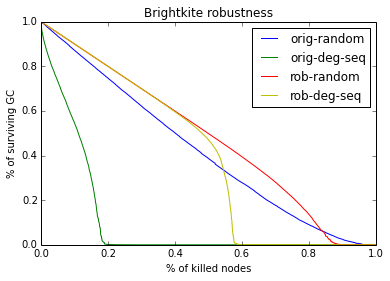

In [22]:
# read the files with the points of the robustness curves and plot the robustness curves

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages

# read the data from the respective files, putting everything into a dict
# each element in the dict stores the two vectors with the data for the corresponding curve
bk = {}
bk["or_rand"] = read_xy("brightkite/bkite_orig_frac_random.txt")
bk["or_deg_seq"] = read_xy("brightkite/bkite_orig_frac_deg_seq.txt")
bk["rob_rand"] = read_xy("brightkite/bkite_rob_frac_random.txt")
bk["rob_deg_seq"] = read_xy("brightkite/bkite_rob_frac_deg_seq.txt")

# plot the 4 curves in the same plot
_ = plt.plot(bk["or_rand"][0], bk["or_rand"][1], 'b-', label = "orig-random")
_ = plt.plot(bk["or_deg_seq"][0], bk["or_deg_seq"][1], 'g-', label = "orig-deg-seq")
_ = plt.plot(bk["rob_rand"][0], bk["rob_rand"][1], 'r-', label = "rob-random")
_ = plt.plot(bk["rob_deg_seq"][0], bk["rob_deg_seq"][1], 'y-', label = "rob-deg-seq")
_ = plt.xlabel("% of killed nodes")
_ = plt.ylabel("% of surviving GC")
_ = plt.title("Brightkite robustness")
_ = plt.legend()

# save the plot to a PDF file
pdf_file = PdfPages('BK_robustness.pdf')
plt.savefig(pdf_file, format="pdf")
pdf_file.close()